In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly as py
import plotly.express as px
import seaborn as sns

%matplotlib inline


### 1. Upload the COVID-19 Data

In [214]:
# Let's read the COVID-19 csv file from World Health Organization
# Link: https://covid19.who.int/

covid = pd.read_csv("./Datasets/WHO-COVID-19-global-data.csv")
covid = covid.rename(columns={' Country':'Country', ' Cumulative_cases':'Cumulative_cases'})
covid

Date_reported  Country_code      Country  WHO_region   New_cases  \
0        2020-01-03            AF  Afghanistan        EMRO           0   
1        2020-01-04            AF  Afghanistan        EMRO           0   
2        2020-01-05            AF  Afghanistan        EMRO           0   
3        2020-01-06            AF  Afghanistan        EMRO           0   
4        2020-01-07            AF  Afghanistan        EMRO           0   
...             ...           ...          ...         ...         ...   
64508    2020-09-28            ZW     Zimbabwe        AFRO           9   
64509    2020-09-29            ZW     Zimbabwe        AFRO           4   
64510    2020-09-30            ZW     Zimbabwe        AFRO          21   
64511    2020-10-01            ZW     Zimbabwe        AFRO           1   
64512    2020-10-02            ZW     Zimbabwe        AFRO          12   

       Cumulative_cases   New_deaths   Cumulative_deaths  
0                     0            0                   0  
1                     0            0                   0  
2                     0            0                   0  
3                     0            0                   0  
4                     0            0                   0  
...                 ...          ...                 ...  
64508              7812            0                 227  
64509              7816            1                 228  
64510              7837            0                 228  
64511              7838            0                 228  
64512              7850            0                 228  

[64513 rows x 8 columns]

### 2. Let's do some dataframe manipulation
* The objective here is to group my covid dataset by Country and by Date and select the cumulative cases greater than 0


In [215]:

covid_countries = covid.groupby(['Country','Date_reported']).sum().reset_index().sort_values('Date_reported', ascending=True)
#covid_countries = covid_countries.drop_duplicates(subset=['Country'])
covid_countries = covid_countries[covid_countries['Cumulative_cases']>0]


### 3. Create the map chart

In [216]:
fig = px.choropleth(covid_countries,
                     locations='Country',
                     locationmode='country names',
                     color='Cumulative_cases',
                     hover_name='Country',
                     animation_frame='Date_reported',
                     #size='Cumulative_cases'
                 )
fig.update_layout(title_text='World Coronavírus Spread',
                 title_x=0.5,
                 geo=dict(
                     showcoastlines=True,)
                 )
fig.show()

### Let's do the Pollution Analysis

In [234]:
# DO NOT RUN THIS CODE WITHOUT THE NASA DATASETS
# Import the data

#co2_df = pd.read_csv('./Datasets/ACEFTS_L2_v4p1_CO2.csv')
#co2_df = co2_df[['Alt_Mean','date','lat','long']]
#co2_df = co2_df.rename(columns={'Alt_Mean':'Alt_Mean_co2'})

#no2_df = pd.read_csv('./Datasets/ACEFTS_L2_v4p1_NO2.csv')
#no2_df = no2_df[['Alt_Mean', 'date', 'lat', 'long']]
#no2_df = no2_df.rename(columns={'Alt_Mean':'Alt_Mean_no2'})

#ch4_df = pd.read_csv('./Datasets/ACEFTS_L2_v4p1_CH4.csv')
#ch4_df = ch4_df[['Alt_Mean','date','lat','long']]
#ch4_df = ch4_df.rename(columns={'Alt_Mean':'Alt_Mean_ch4'})

#o3_df = pd.read_csv('./Datasets/ACEFTS_L2_v4p1_O3.csv')
#o3_df = o3_df[['Alt_Mean','date','lat','long']]
#o3_df = o3_df.rename(columns={'Alt_Mean':'Alt_Mean_o3'})

# Let's merge all dataframes 
#df_pollution = pd.merge(pd.merge(pd.merge(co2_df, no2_df), ch4_df), o3_df)

# Let's export the final dataframe
#df_pollution.to_csv('df_pollution.csv', index=False) 


In [230]:
df_pollution=pd.read_csv('./df_pollution.csv')

In [233]:
# Let's create a column in the dataframe that is the lat, long convert to the country name
latlon_country = []
import reverse_geocode
for i in range(0, len(df_pollution)):
    coordinates = (df_pollution['lat'][i], df_pollution['long'][i]),
    latlon_country.append(reverse_geocode.search(coordinates)[0]['country'])
df_pollution['Country'] = latlon_country

# Let's group the dataset by country, day and then sum the values from each day
df_pollution = df_pollution.groupby(['Country','date']).sum().reset_index().sort_values('date', ascending=True)
df_pollution

Country        date  Alt_Mean_co2     lat    long  Alt_Mean_no2  \
0     Afghanistan  2004-02-01      0.002522 -213.46 -133.63  9.222539e-09   
1     Afghanistan  2004-02-02      0.001030  -71.74  -11.48  3.512661e-09   
2     Afghanistan  2004-02-03      0.001262  -59.65  438.51  4.220473e-09   
3     Afghanistan  2004-02-04      0.001026  -24.73  223.73  3.373543e-09   
4     Afghanistan  2004-02-05      0.002027   -9.84  101.68  6.606813e-09   
...           ...         ...           ...     ...     ...           ...   
9038       Zambia  2020-09-08      0.006450    0.75  400.75  9.930425e-09   
9039       Zambia  2020-09-09      0.005042 -239.00  510.48  6.978390e-09   
9040       Zambia  2020-09-10      0.003060  354.68  665.99  6.039252e-09   
9041     Zimbabwe  2020-09-10      0.002820 -395.85 -148.13  2.983373e-09   
9042     Zimbabwe  2020-09-11      0.004436  -32.39   78.31  6.635699e-09   

      Alt_Mean_ch4  Alt_Mean_o3  
0         0.000004     0.000018  
1         0.000002     0.000007  
2         0.000002     0.000009  
3         0.000002     0.000007  
4         0.000003     0.000015  
...            ...          ...  
9038      0.000006     0.000032  
9039      0.000005     0.000023  
9040      0.000003     0.000016  
9041      0.000002     0.000012  
9042      0.000004     0.000022  

[9043 rows x 8 columns]

In [232]:
# Let's plot the mapa mundi chart for a date greater than 2020-01-01 and the CO2 emission

df_pollution_new = df_pollution[df_pollution['date']>='2020-01-04']

fig = px.scatter_geo(df_pollution_new,
                     locations='Country',
                     locationmode='country names',
                     color='Alt_Mean_co2',
                     hover_name='Country',
                     animation_frame='date',
                     size='Alt_Mean_co2'
                 )
fig.update_layout(title_text='CO2 emission',
                 title_x=0.5,
                 geo=dict(
                     showcoastlines=True,)
                 )
fig.show()

### 5. Let's do the correlation matrix

In [235]:
# Let's merge the covid and the pollution dataframe
pollution_and_covid = pd.merge(covid_countries, df_pollution_new, on='Country')
pollution_and_covid

Country Date_reported   New_cases  Cumulative_cases   New_deaths  \
0            China    2020-01-04           1                 1            0   
1            China    2020-01-04           1                 1            0   
2            China    2020-01-04           1                 1            0   
3            China    2020-01-04           1                 1            0   
4            China    2020-01-04           1                 1            0   
...            ...           ...         ...               ...          ...   
455603  Tajikistan    2020-09-28          41              9646            0   
455604  Tajikistan    2020-09-29          39              9685            0   
455605  Tajikistan    2020-09-30          41              9726            0   
455606  Tajikistan    2020-10-01          43              9769            1   
455607  Tajikistan    2020-10-02          42              9811            1   

         Cumulative_deaths        date  Alt_Mean_co2    lat    long  \
0                        0  2020-02-15      0.000284  31.28  112.37   
1                        0  2020-02-16      0.000282  40.48   78.77   
2                        0  2020-02-21      0.000282  35.87  120.34   
3                        0  2020-02-22      0.000268  35.31   95.74   
4                        0  2020-04-02      0.000274  49.41  117.67   
...                    ...         ...           ...    ...     ...   
455603                  75  2020-09-04      0.000281  38.04   74.69   
455604                  75  2020-09-04      0.000281  38.04   74.69   
455605                  75  2020-09-04      0.000281  38.04   74.69   
455606                  76  2020-09-04      0.000281  38.04   74.69   
455607                  77  2020-09-04      0.000281  38.04   74.69   

        Alt_Mean_no2  Alt_Mean_ch4  Alt_Mean_o3  
0       7.751494e-10  3.336779e-07     0.000002  
1       8.131563e-10  3.460202e-07     0.000002  
2       5.309469e-10  3.731368e-07     0.000002  
3       5.317510e-10  3.334261e-07     0.000002  
4       8.191298e-10  3.307907e-07     0.000002  
...              ...           ...          ...  
455603  6.171730e-10  4.102214e-07     0.000002  
455604  6.171730e-10  4.102214e-07     0.000002  
455605  6.171730e-10  4.102214e-07     0.000002  
455606  6.171730e-10  4.102214e-07     0.000002  
455607  6.171730e-10  4.102214e-07     0.000002  

[455608 rows x 13 columns]

In [236]:
# Let's create the correlation between the columns
corr_matrix = pollution_and_covid.corr()
corr_matrix = corr_matrix[[' New_cases','Cumulative_cases',' New_deaths',' Cumulative_deaths',
                           'Alt_Mean_co2','Alt_Mean_no2','Alt_Mean_ch4','Alt_Mean_o3']]
corr_matrix

# This will maks the values mirrored
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True



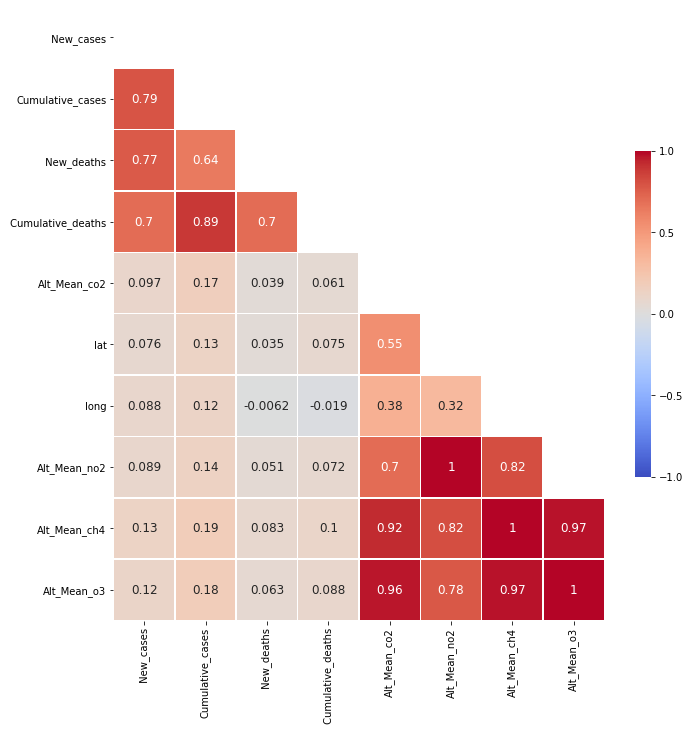

In [237]:
# Plot the correlation matrix chart
f, ax = plt.subplots(figsize=(11, 15)) 
heatmap = sns.heatmap(corr_matrix, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})
#add the column names as labels

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})